First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Numerical columns statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Categorical columns statistics:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644



Missing values per column before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Dataset shape: (891, 12)

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Total survived: 342
Total not survived: 549
Survival rate: 38.38%

Input features (X): ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Pclass_category']
Output target (y): Survived


C:\Users\iamus\AppData\Local\Temp\ipykernel_13788\2048429480.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\iamus\AppData\Local\Temp\ipykernel_13788\2048429480.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

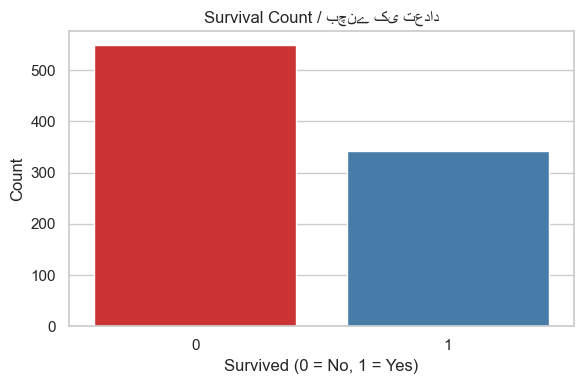

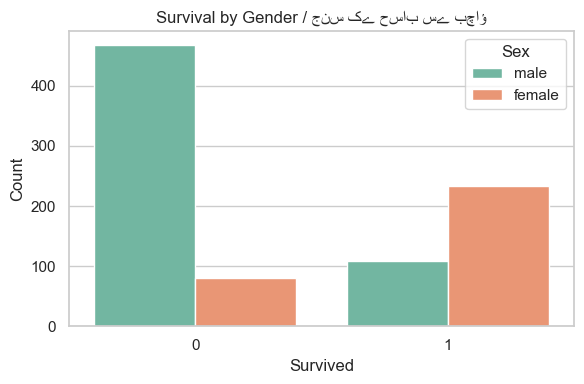

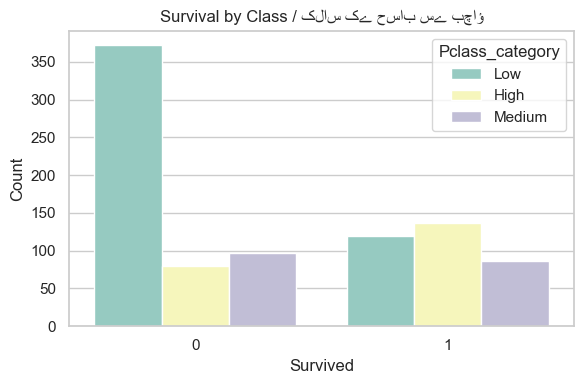

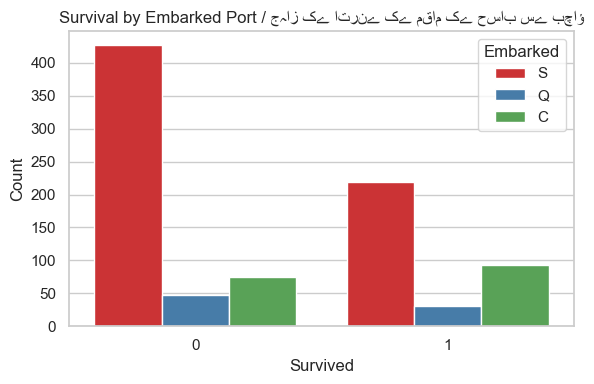

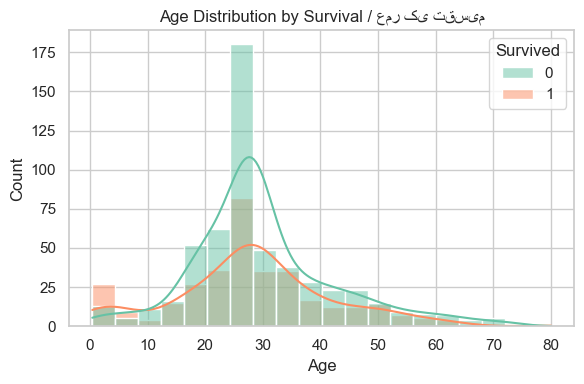

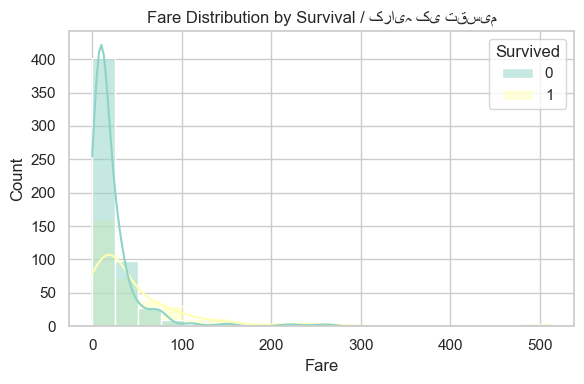

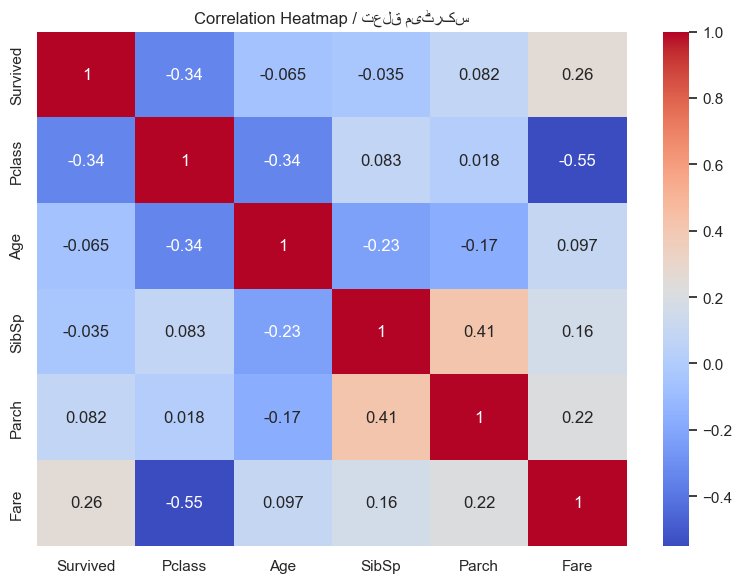

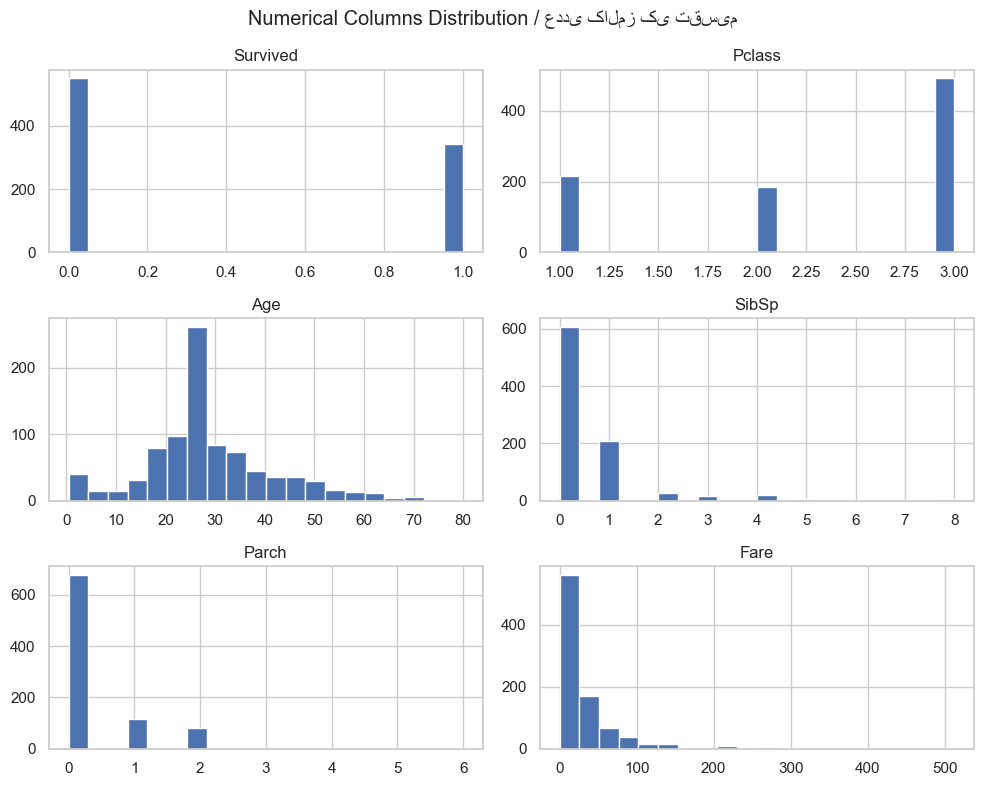


Categorical columns after preprocessing: ['Sex', 'Embarked', 'Pclass_category']
Numerical columns after preprocessing: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [106]:
# -----------------------------
# Day 1 Titanic EDA (No ML)
# -----------------------------

# ✅ Import basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -----------------------------
# 1️⃣ Load Dataset
# -----------------------------
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("First 5 rows:")
display(df.head())

# -----------------------------
# 2️⃣ Identify categorical & numerical columns
# -----------------------------
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# -----------------------------
# 3️⃣ Dataset basic info
# -----------------------------
print("\nDataset Info:")
df.info()

print("\nNumerical columns statistics:")
display(df[numerical_cols].describe())

print("\nCategorical columns statistics:")
display(df[categorical_cols].describe())

# -----------------------------
# 4️⃣ Missing values check
# -----------------------------
print("\nMissing values per column before cleaning:")
print(df.isnull().sum())
print("Dataset shape:", df.shape)

# -----------------------------
# 5️⃣ Handle missing values
# -----------------------------
# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)
# Drop Cabin column (too many missing)
df.drop(columns=["Cabin"], inplace=True)
# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# -----------------------------
# 6️⃣ Drop useless columns
# -----------------------------
# PassengerId, Name, Ticket are not useful for ML
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

# -----------------------------
# 7️⃣ Map Pclass to category (optional)
# -----------------------------
df["Pclass_category"] = df["Pclass"].map({1: "High", 2: "Medium", 3: "Low"})

# -----------------------------
# 8️⃣ Basic survival statistics
# -----------------------------
total_survived = df["Survived"].sum()
total_not_survived = df.shape[0] - total_survived
survival_rate = (total_survived / df.shape[0]) * 100

print("\nTotal survived:", total_survived)
print("Total not survived:", total_not_survived)
print("Survival rate: {:.2f}%".format(survival_rate))

# -----------------------------
# 9️⃣ Input (X) & Output (y)
# -----------------------------
X = df.drop("Survived", axis=1)  # Features
y = df["Survived"]               # Target

print("\nInput features (X):", X.columns.tolist())
print("Output target (y):", y.name)

# -----------------------------
# 10️⃣ Visualizations
# -----------------------------

# 1️⃣ Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="Set1")
plt.title("Survival Count / بچنے کی تعداد")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2️⃣ Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Sex", data=df, palette="Set2")
plt.title("Survival by Gender / جنس کے حساب سے بچاؤ")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3️⃣ Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Pclass_category", data=df, palette="Set3")
plt.title("Survival by Class / کلاس کے حساب سے بچاؤ")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 4️⃣ Survival by Embarked Port
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Embarked", data=df, palette="Set1")
plt.title("Survival by Embarked Port / جہاز کے اترنے کے مقام کے حساب سے بچاؤ")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 5️⃣ Age distribution by Survival
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Age", hue="Survived", kde=True, bins=20, palette="Set2")
plt.title("Age Distribution by Survival / عمر کی تقسیم")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 6️⃣ Fare distribution by Survival
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Fare", hue="Survived", kde=True, bins=20, palette="Set3")
plt.title("Fare Distribution by Survival / کرایہ کی تقسیم")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -----------------------------
# 11️⃣ Correlation Heatmap (numerical columns)
# -----------------------------
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap / تعلق میٹرکس")
plt.tight_layout()
plt.show()

# -----------------------------
# 12️⃣ Histograms for all numerical columns
# -----------------------------
df[numerical_cols].hist(figsize=(10,8), bins=20)
plt.suptitle("Numerical Columns Distribution / عددی کالمز کی تقسیم")
plt.tight_layout()
plt.show()

# -----------------------------
# 13️⃣ Updated column types
# -----------------------------
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns after preprocessing:", categorical_cols)
print("Numerical columns after preprocessing:", numerical_cols)
